Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.
Dataset:
1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3.	FM - May indicate "Fetal Movements" detected by the monitor.
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.

In [2]:
import pandas as pd 
import numpy as np
df=pd.read_csv(r"Z:\data science - excelr\python\portal assignements\EDA1\EDA1\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.shape

(2126, 14)

In [4]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
# Impute missing values for numerical variables using mean imputation
numerical_columns = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

# Check if any missing values remain
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [7]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [8]:
# Convert columns with incorrect data types to the appropriate types
df['Tendency'] = df['Tendency'].astype('category')
df['NSP'] = df['NSP'].astype('category')

# Display the updated data types
print(df.dtypes)    

LB           float64
AC           float64
FM           float64
UC           float64
DL           float64
DS           float64
DP           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
Width        float64
Tendency    category
NSP         category
dtype: object


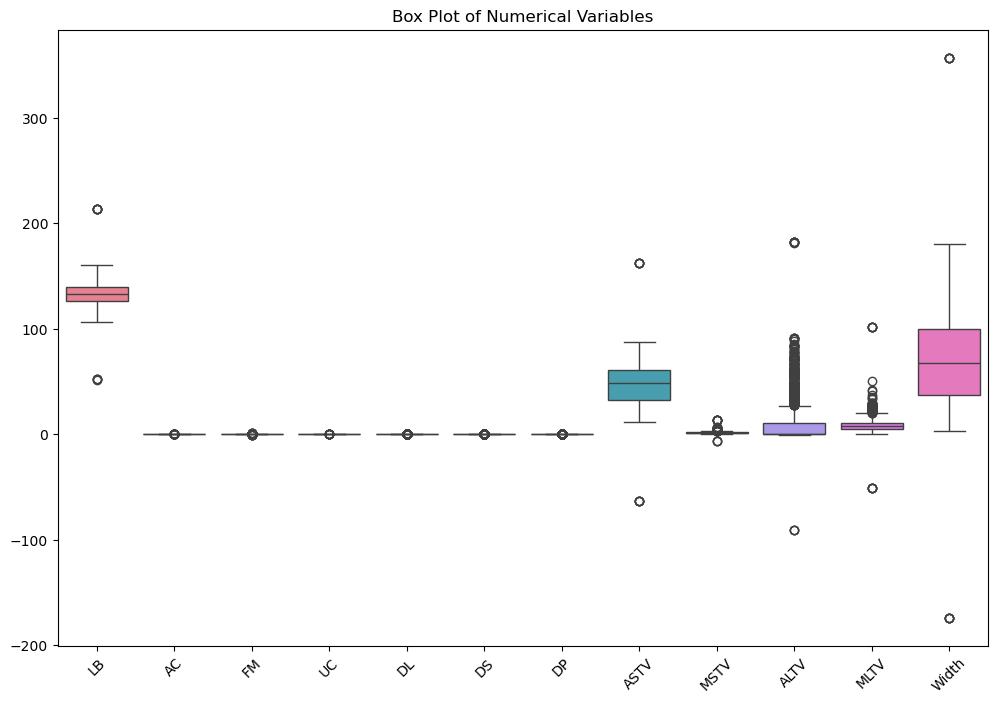

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the data using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Define a function to treat outliers using IQR method
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Treat outliers using IQR method for selected columns
columns_to_treat = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']
df_cleaned = treat_outliers_iqr(df, columns_to_treat)

2.	Statistical Summary:

In [12]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000


3.Data Visualization:

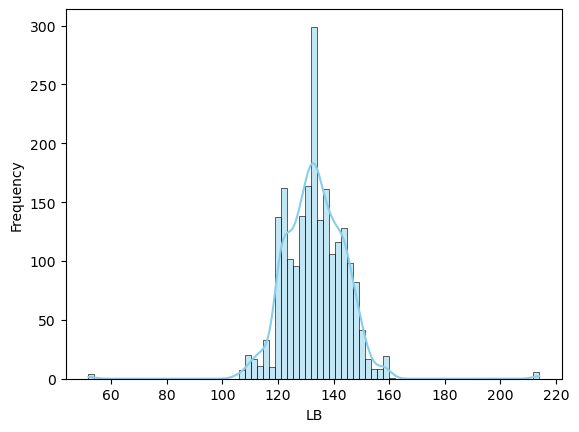

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
sns.histplot(df['LB'], kde=True, color='skyblue')
plt.xlabel('LB')
plt.ylabel('Frequency')
plt.show()

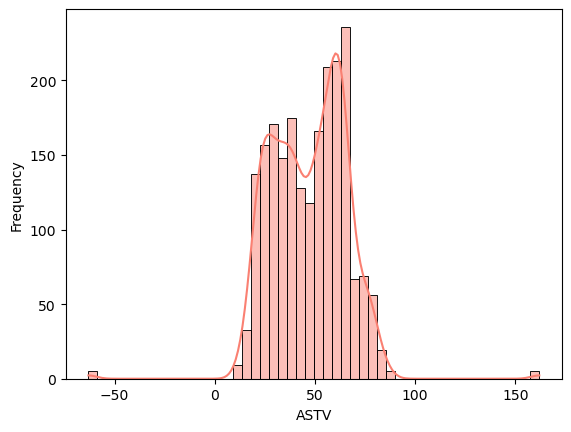

In [15]:
sns.histplot(df['ASTV'],kde=True, color='salmon')
plt.xlabel('ASTV')
plt.ylabel('Frequency')
plt.show()

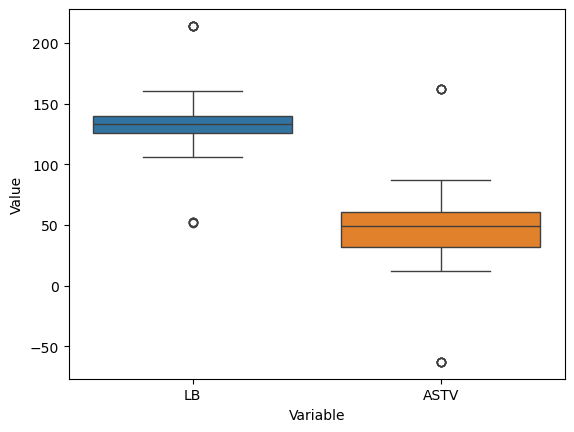

In [16]:
# Boxplots
sns.boxplot(data=df[['LB', 'ASTV']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

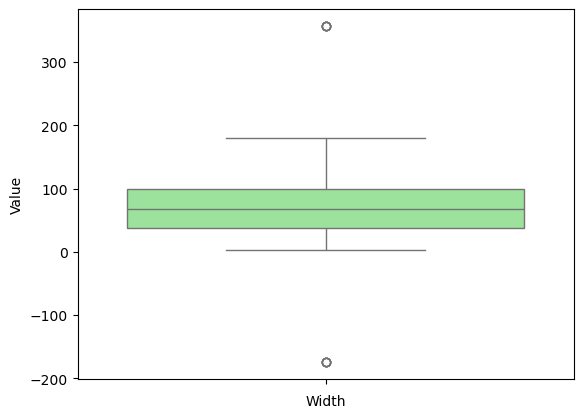

In [17]:
sns.boxplot(data=df['Width'], color='lightgreen')
plt.xlabel('Width')
plt.ylabel('Value')
plt.show()

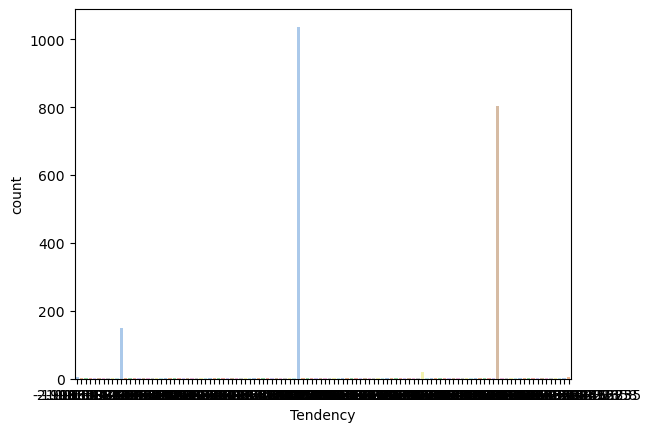

In [18]:
# Bar chart for "Tendency"
sns.countplot(x='Tendency', data=df, palette='pastel', hue='Tendency', legend=False)
plt.show()

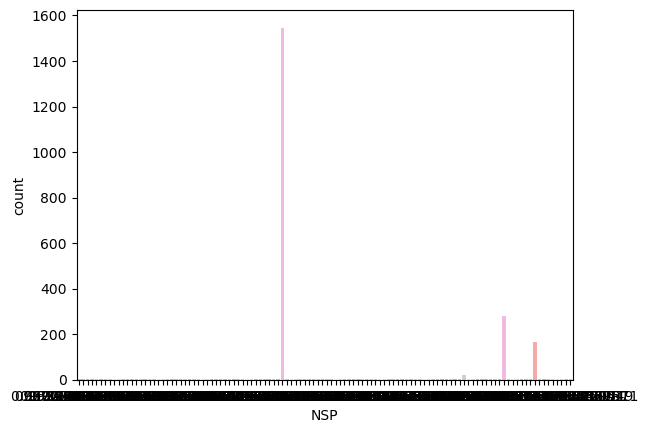

In [19]:
# Bar chart for "NSP"
sns.countplot(x='NSP', data=df,palette='pastel', hue='NSP', legend=False)
plt.show()

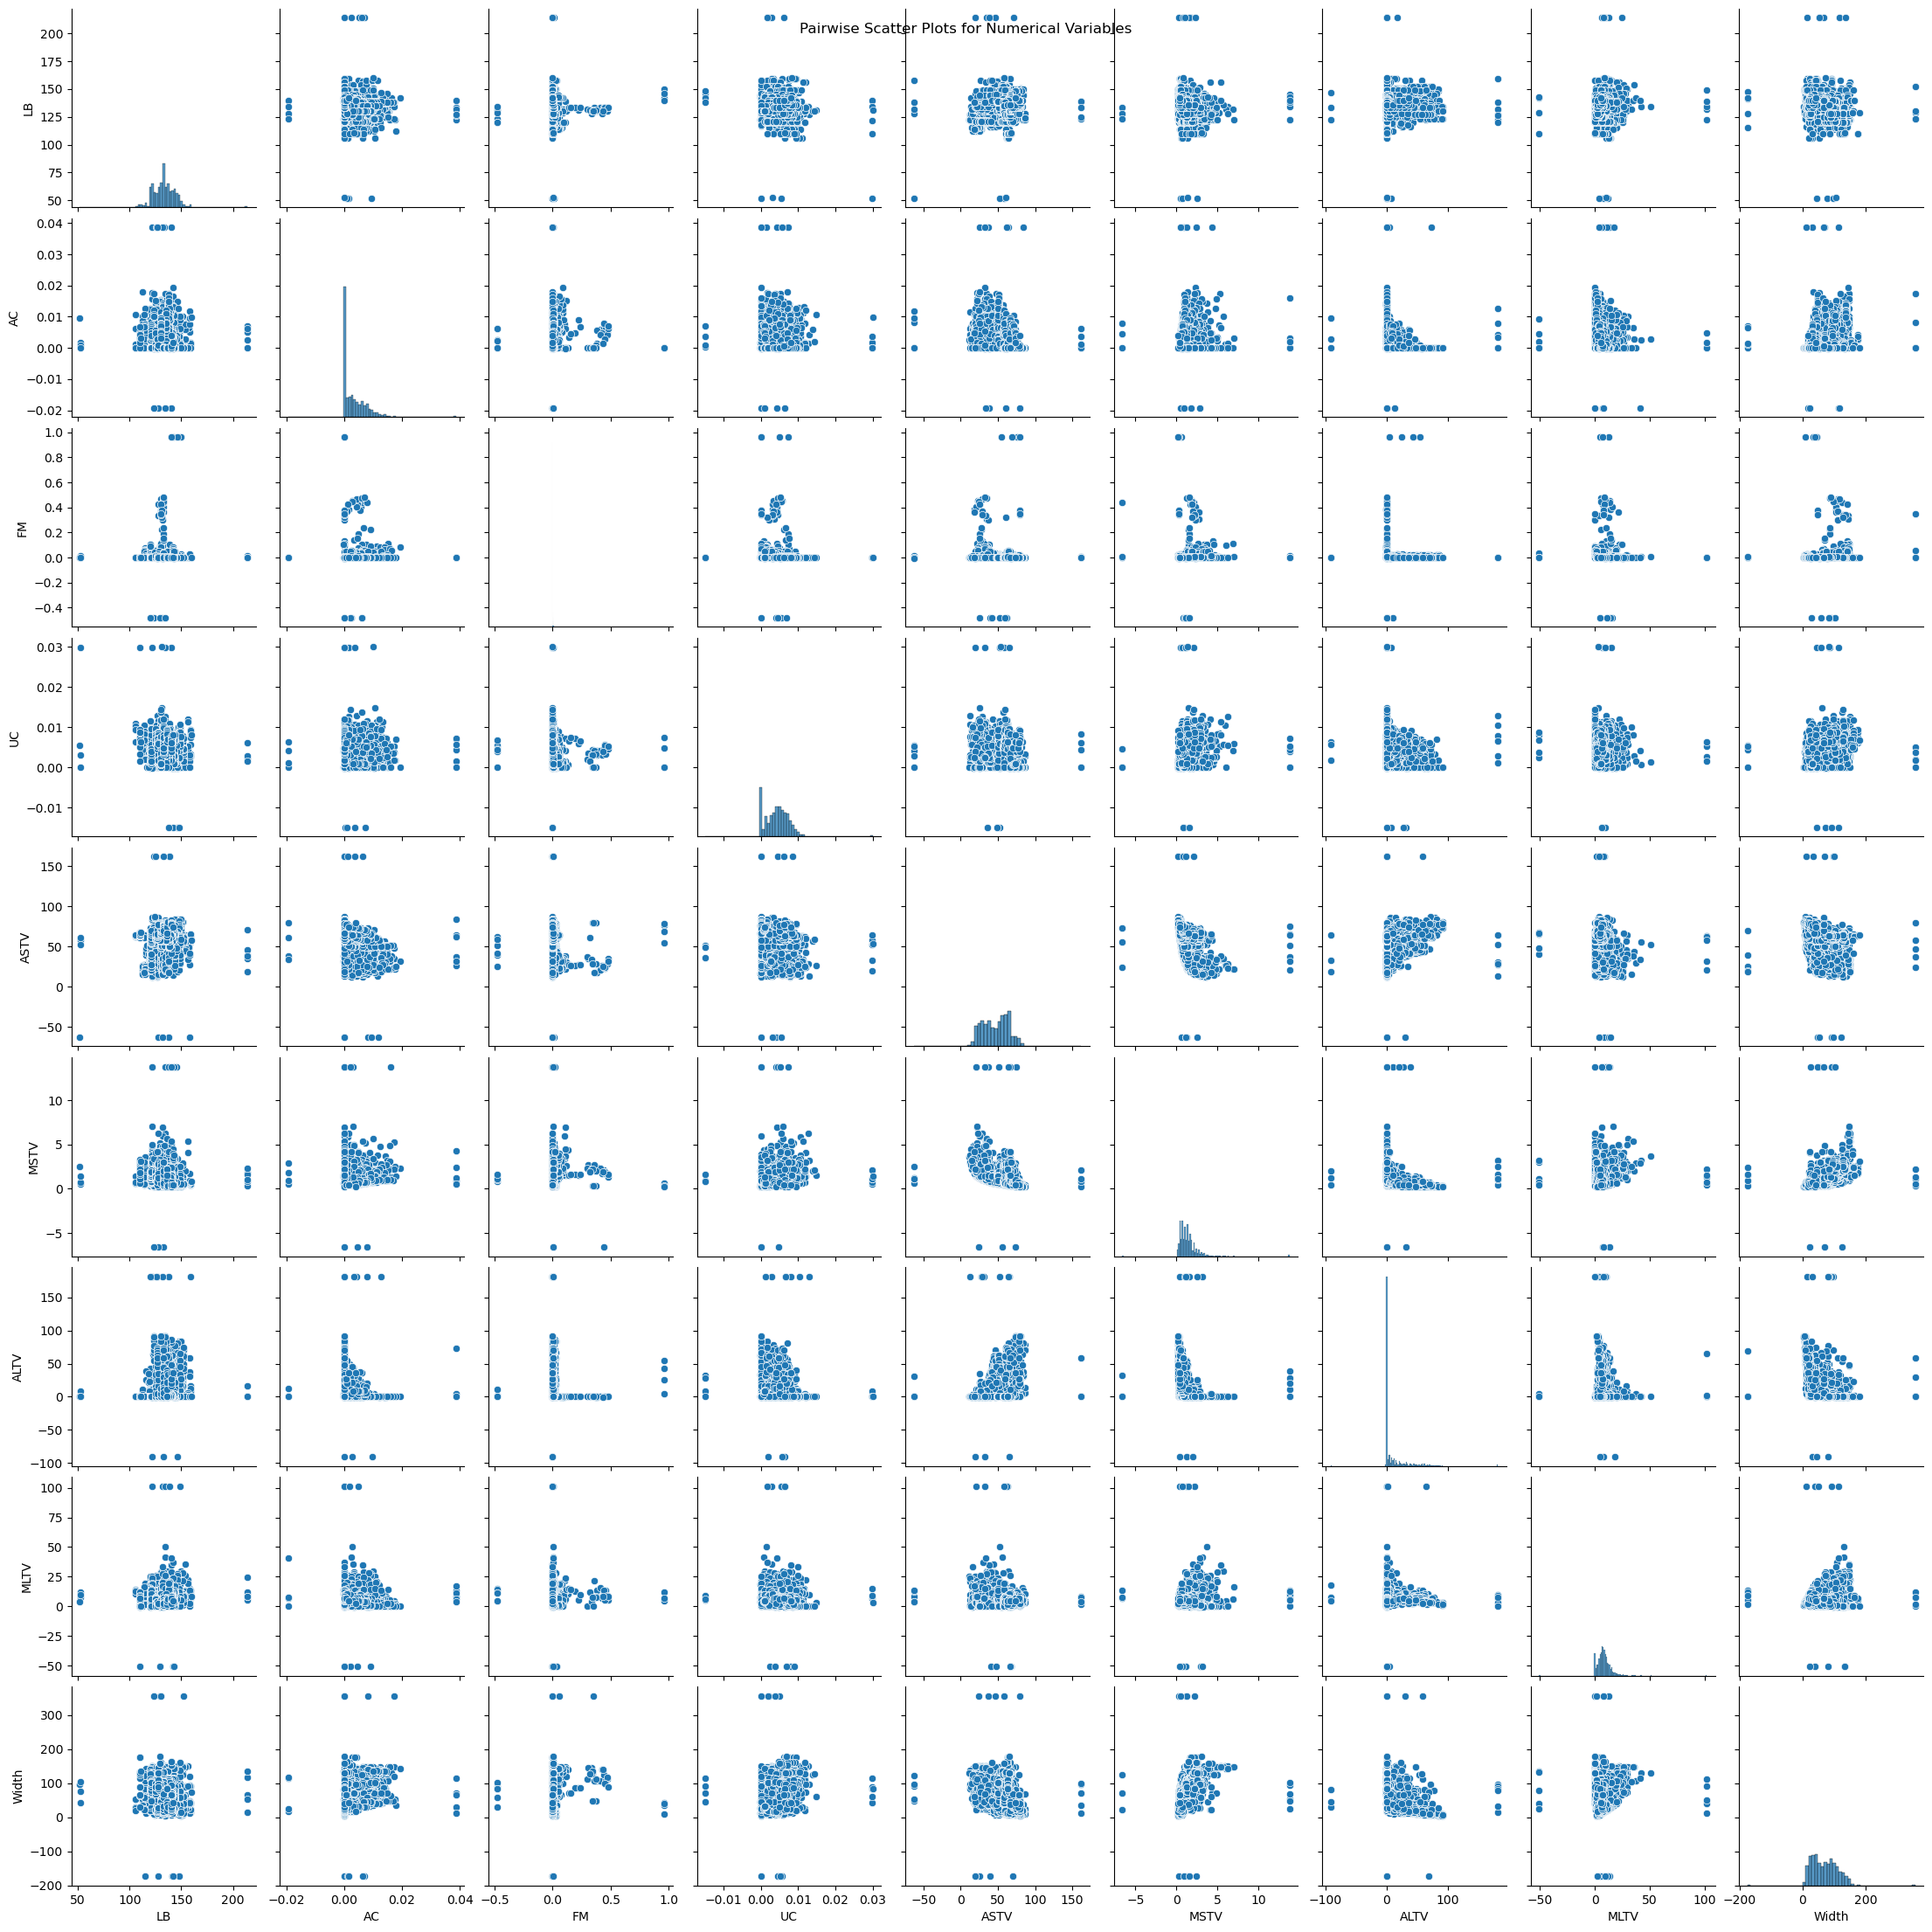

In [20]:
# Scatter plots for pairs of numerical variables
sns.pairplot(df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width']])
plt.suptitle('Pairwise Scatter Plots for Numerical Variables')
plt.show()

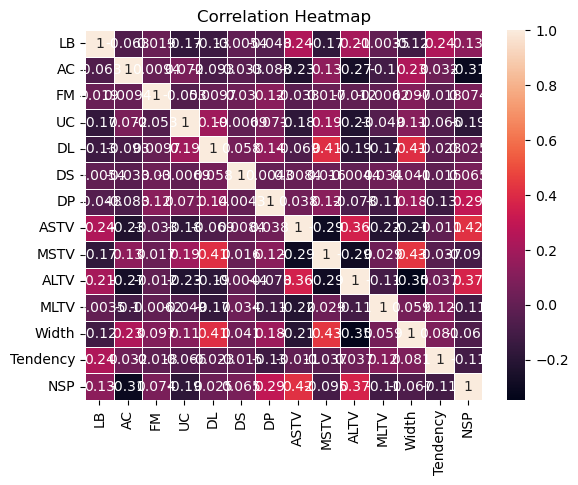

In [21]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

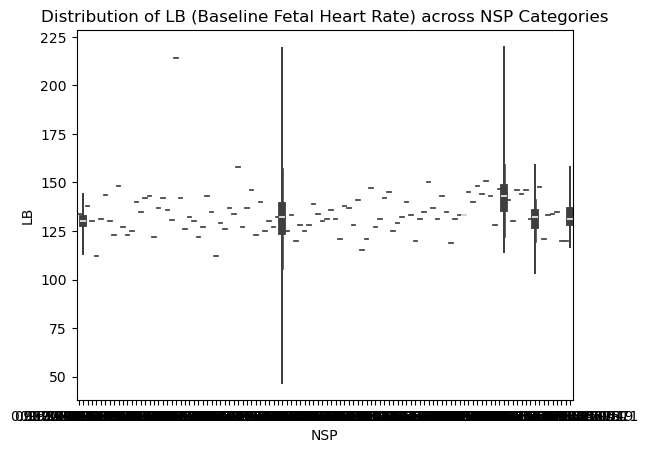

In [22]:
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Distribution of LB (Baseline Fetal Heart Rate) across NSP Categories')
plt.xlabel('NSP')
plt.ylabel('LB')
plt.show()

4.Pattern Recognition and Insights:

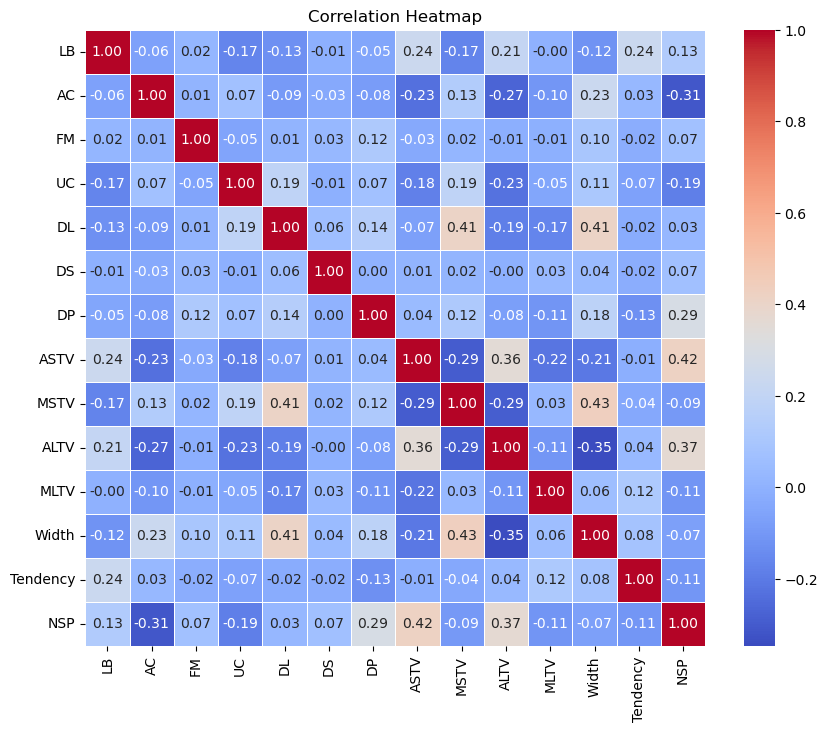

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Positive Correlations:

LB (Baseline Fetal Heart Rate) has a moderate positive correlation with several variables, such as AC (Accelerations), FM (Fetal Movements), and UC (Uterine Contractions). This suggests that as LB increases, these variables tend to increase as well. This could indicate normal fetal activity and well-being. ASTV (Percentage of Time with Abnormal Short Term Variability) has a moderate positive correlation with MLTV (Mean Value of Long Term Variability). This suggests that abnormal short-term variability may be associated with abnormal long-term variability in fetal heart rate patterns.

Negative Correlations:

There are no strong negative correlations between variables based on the heatmap.

Implications:

Understanding these correlations can help clinicians and researchers identify patterns in fetal heart rate monitoring data and assess fetal well-being. Positive correlations between LB and other variables may indicate normal physiological responses, while negative correlations or lack of correlations may warrant further investigation.